In [530]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [531]:
data = pd.read_excel("tourismData.xlsx",'Tourism')

In [532]:
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [533]:
data['ProdTaken'].dtypes

dtype('int64')

In [534]:
cat_col = [feature for feature in data.columns if data[feature].dtype == 'O']

In [535]:
num_col = [feature for feature in data.columns if data[feature].dtype != 'O']

In [536]:
num_col

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisited',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisited',
 'MonthlyIncome']

In [537]:
data.isna().sum()

CustomerID                   0
ProdTaken                    0
Age                        226
TypeofContact               25
CityTier                     0
DurationOfPitch            251
Occupation                   0
Gender                       0
NumberOfPersonVisited        0
NumberOfFollowups           45
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips              140
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisited     66
Designation                  0
MonthlyIncome              233
dtype: int64

In [538]:
nullValues = [feature for feature in data.columns if data[feature].isna().sum()>0]

nullValues

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisited',
 'MonthlyIncome']

In [539]:
data[nullValues].dtypes

Age                        float64
TypeofContact               object
DurationOfPitch            float64
NumberOfFollowups          float64
PreferredPropertyStar      float64
NumberOfTrips              float64
NumberOfChildrenVisited    float64
MonthlyIncome              float64
dtype: object

In [540]:
for i in data[nullValues].columns:
    print(i)
    print(data[i].unique())
    print()


Age
[41. 49. 37. 33. nan 32. 59. 30. 38. 36. 35. 31. 34. 28. 29. 22. 53. 21.
 42. 44. 46. 39. 24. 43. 50. 27. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58.
 20. 25. 19. 57. 52. 47. 18. 60. 61.]

TypeofContact
['Self Enquiry' 'Company Invited' nan]

DurationOfPitch
[  6.  14.   8.   9.  30.  29.  33.  22.  21.  32.  25.  27.  11.  17.
  15.  13.  12.  16.  10.  31.  18.  nan  24.  35.  28.  20.  26.  34.
  23.   5.  19. 126.   7.  36. 127.]

NumberOfFollowups
[ 3.  4.  2.  5. nan  1.  6.]

PreferredPropertyStar
[ 3.  4.  5. nan]

NumberOfTrips
[ 1.  2.  7.  5.  6.  3.  4. 19. 21.  8. nan 20. 22.]

NumberOfChildrenVisited
[ 0.  2.  1. nan  3.]

MonthlyIncome
[20993. 20130. 17090. ... 22097. 22995. 21471.]



In [541]:
nullValues

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisited',
 'MonthlyIncome']

In [542]:
data['Age'].fillna(data['Age'].median(),inplace=True) 
data['TypeofContact'].fillna(data['TypeofContact'].mode()[0],inplace=True)
data['DurationOfPitch'].fillna(data['DurationOfPitch'].median(),inplace=True)
data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].median(),inplace=True)
data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].median(),inplace=True)
data['NumberOfTrips'].fillna(data['NumberOfTrips'].median(),inplace=True)
data['NumberOfChildrenVisited'].fillna(data['NumberOfChildrenVisited'].median(),inplace=True)
data['MonthlyIncome'].fillna(data['MonthlyIncome'].median(),inplace=True)


data.isna().sum()

CustomerID                 0
ProdTaken                  0
Age                        0
TypeofContact              0
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersonVisited      0
NumberOfFollowups          0
ProductPitched             0
PreferredPropertyStar      0
MaritalStatus              0
NumberOfTrips              0
Passport                   0
PitchSatisfactionScore     0
OwnCar                     0
NumberOfChildrenVisited    0
Designation                0
MonthlyIncome              0
dtype: int64

In [543]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4888.0,37.547259,9.104795,18.0,31.00,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.00,13.0,19.00,127.0
NumberOfPersonVisited,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [544]:
data = data[['Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome','ProdTaken']]

<AxesSubplot:>

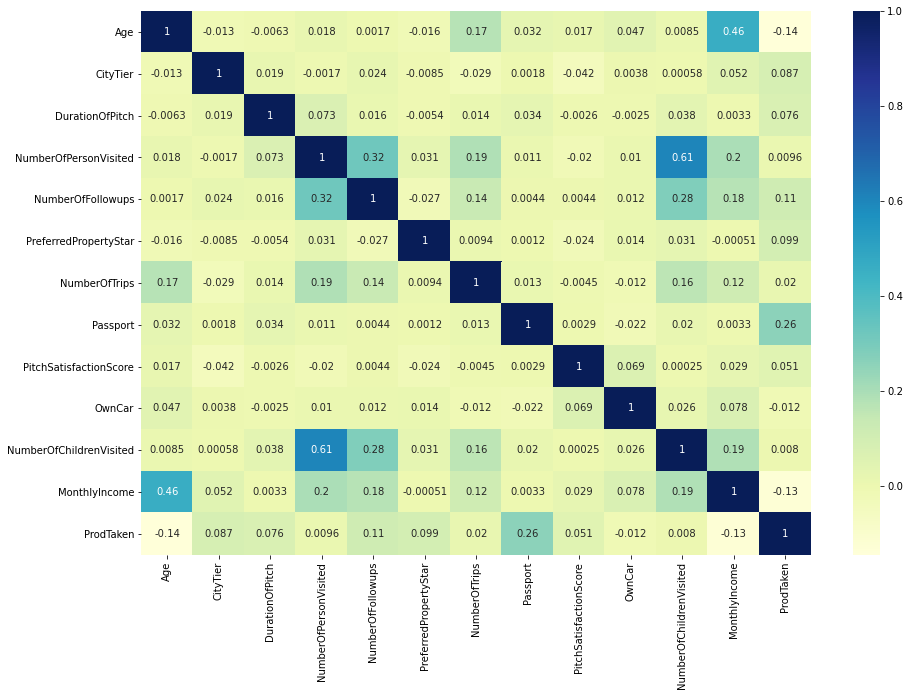

In [545]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [546]:
CatFr = [feature for feature in data.columns if data[feature].dtype == 'O']
NumFr = [feature for feature in data.columns if data[feature].dtype != 'O']
print("Cat feature :", len(CatFr))
print("Num feature :", len(NumFr))

Cat feature : 6
Num feature : 13


In [547]:

smallValueFeature = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation',
                     'CityTier','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar',
                     'Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisited']

longValueFeature = ['Age','DurationOfPitch','NumberOfTrips','MonthlyIncome']


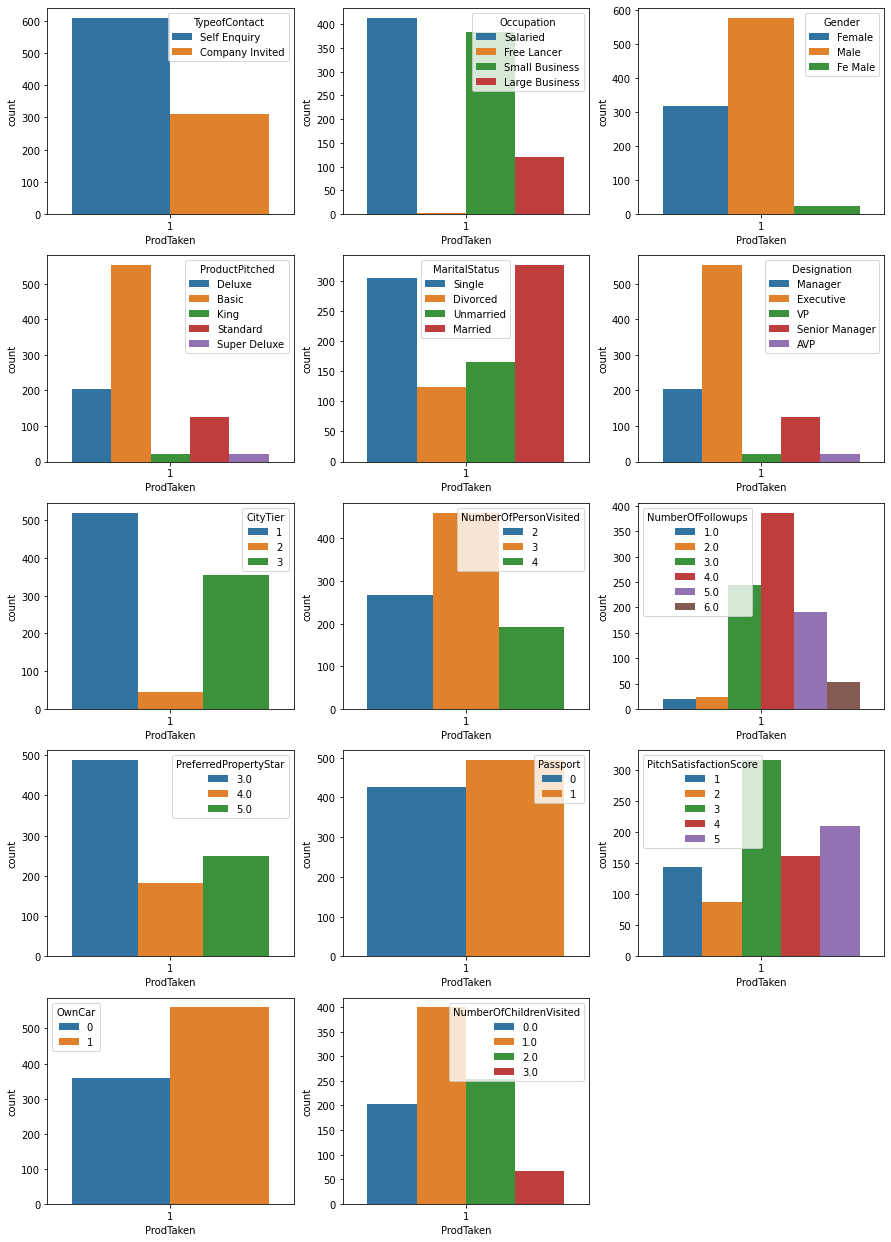

In [548]:
df=data[data.ProdTaken==1]

plt.figure(figsize=(15,22))
for i in enumerate(smallValueFeature):
    plt.subplot(5,3,i[0]+1)
    sns.countplot(data=df,x = df['ProdTaken'],hue=df[i[1]])
    

In [549]:
data.cov()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome,ProdTaken
Age,82.897296,-0.106432,-0.474082,0.117849,0.015291,-0.115614,2.899208,0.133988,0.216277,0.209272,0.065853,2.208239e+04,-0.511659
CityTier,-0.106432,0.840125,0.148220,-0.001110,0.022265,-0.006194,-0.048031,0.000747,-0.052778,0.001698,0.000452,2.495881e+02,0.031120
DurationOfPitch,-0.474082,0.148220,69.158617,0.441048,0.128802,-0.036070,0.214534,0.126645,-0.028983,-0.010109,0.270161,1.462473e+02,0.248640
NumberOfPersonVisited,0.117849,-0.001110,0.441048,0.525466,0.235106,0.017632,0.251198,0.003680,-0.019386,0.003646,0.374610,7.563622e+02,0.002728
NumberOfFollowups,0.015291,0.022265,0.128802,0.235106,0.996545,-0.021473,0.245836,0.002000,0.006005,0.005905,0.239585,9.233717e+02,0.043536
PreferredPropertyStar,-0.115614,-0.006194,-0.036070,0.017632,-0.021473,0.635216,0.013703,0.000442,-0.026146,0.005252,0.021304,-2.127043e+00,0.030753
NumberOfTrips,2.899208,-0.048031,0.214534,0.251198,0.245836,0.013703,3.322487,0.010702,-0.011206,-0.010761,0.250161,1.104158e+03,0.014044
Passport,0.133988,0.000747,0.126645,0.003680,0.002000,0.000442,0.010702,0.206326,0.001815,-0.004923,0.007838,7.960275e+00,0.046318
PitchSatisfactionScore,0.216277,-0.052778,-0.028983,-0.019386,0.006005,-0.026146,-0.011206,0.001815,1.865387,0.045641,0.000293,2.075888e+02,0.027440
OwnCar,0.209272,0.001698,-0.010109,0.003646,0.005905,0.005252,-0.010761,-0.004923,0.045641,0.235577,0.010615,2.002224e+02,-0.002184


In [550]:
data['Age'].skew()

0.41579605786474494

In [551]:
checkSkew = ['Age','CityTier','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar',
 'NumberOfTrips','PitchSatisfactionScore','NumberOfChildrenVisited','MonthlyIncome']

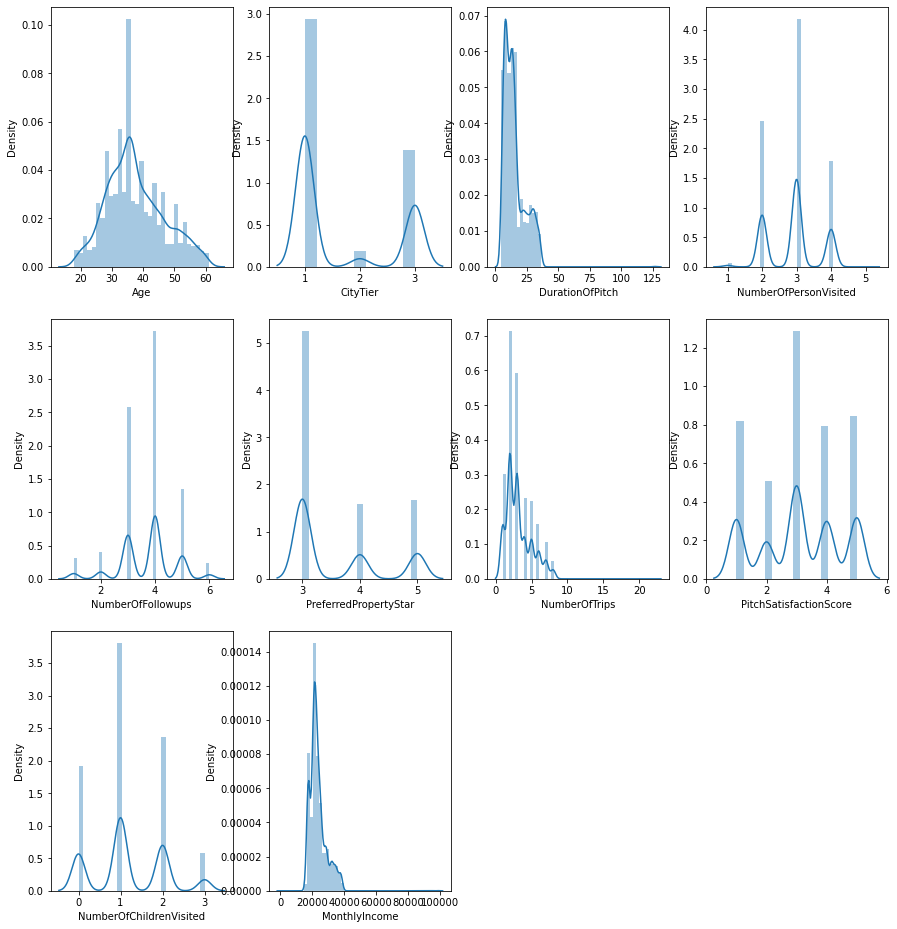

In [552]:
plt.figure(figsize=(15,22))
for i in enumerate(checkSkew):
    plt.subplot(4,4,i[0]+1)
    sns.distplot(data[i[1]],kde=True)

In [553]:
from scipy.stats import normaltest

In [554]:
for i in checkSkew:
    
    print(i+" "+str(normaltest(data[i])[1]*100))

Age 1.4042870631749366e-33
CityTier 0.0
DurationOfPitch 0.0
NumberOfPersonVisited 2.1153117393921714e-79
NumberOfFollowups 5.047249990137504e-34
PreferredPropertyStar 1.933730377004348e-210
NumberOfTrips 0.0
PitchSatisfactionScore 0.0
NumberOfChildrenVisited 2.1970009344837837e-42
MonthlyIncome 0.0


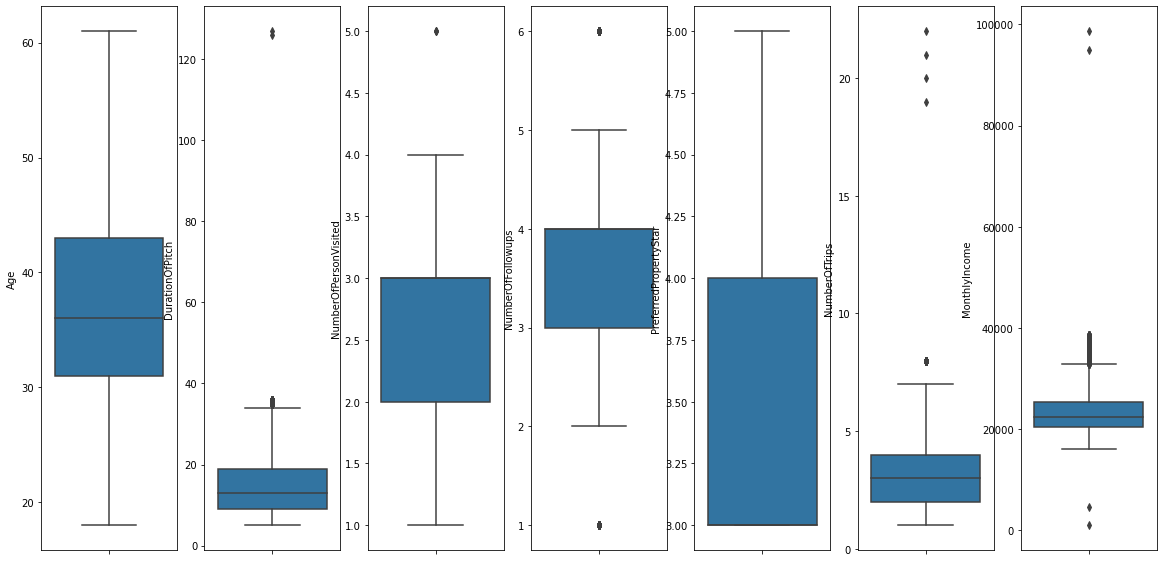

In [555]:
Outliers = ['Age','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar',
 'NumberOfTrips','MonthlyIncome']


plt.figure(figsize=(20,10))
for i in enumerate(Outliers):
    plt.subplot(1,7,i[0]+1)
    sns.boxplot(y=data[i[1]])
    
    

In [556]:
def get_iqr(df,column_name,q1_range,q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3-q1
    upper_fence = q3 + (1.5*IQR)
    lower_fence = q1 - (1.5*IQR)
    
    return IQR,upper_fence,lower_fence


get_iqr(data,'MonthlyIncome',0.20,0.90)


(12048.900000000001, 49943.25, 1747.6499999999978)

In [557]:
data[data['MonthlyIncome']<lower_limit]

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,ProdTaken
142,38.0,Self Enquiry,1,9.0,Large Business,Female,2,3.0,Deluxe,3.0,Single,4.0,1,5,0,0.0,Manager,1000.0,0
2586,39.0,Self Enquiry,1,10.0,Large Business,Female,3,4.0,Deluxe,3.0,Single,5.0,1,5,0,1.0,Manager,4678.0,0


In [558]:
lower_limit

6415.5

In [559]:
data[data['MonthlyIncome']>upper_limit]


,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,ProdTaken
38,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0,0
2482,37.0,Self Enquiry,1,12.0,Salaried,Female,3,5.0,Basic,5.0,Divorced,2.0,1,2,1,1.0,Executive,98678.0,0


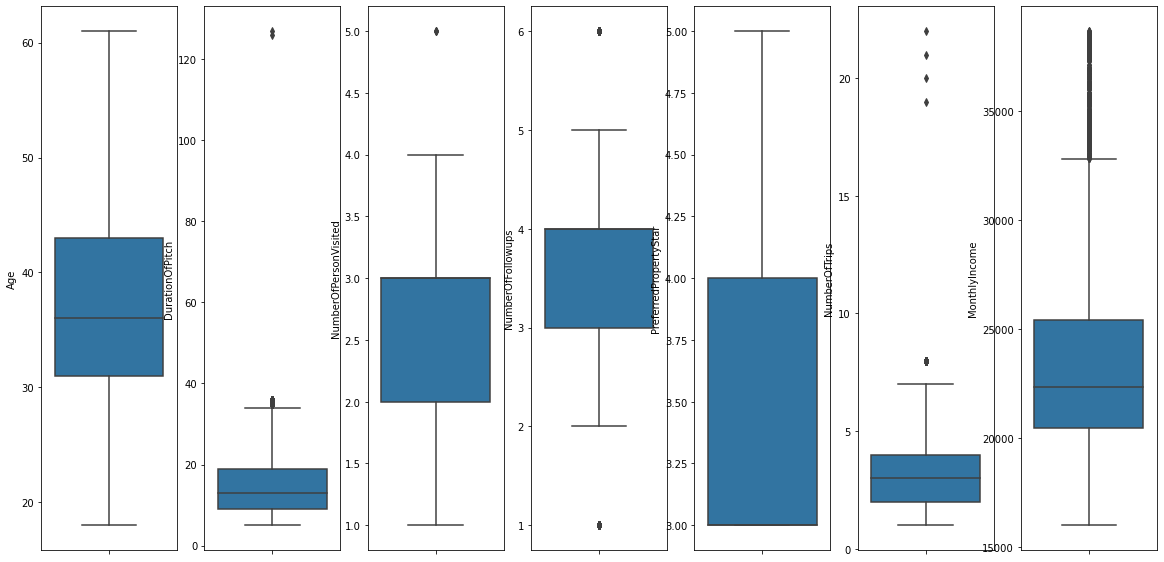

In [560]:
indexUL = data[data['MonthlyIncome']>upper_limit].index
indexLM = data[data['MonthlyIncome']<lower_limit].index
data.drop(indexUL,inplace=True)
data.drop(indexLM,inplace=True)

Outliers = ['Age','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar',
 'NumberOfTrips','MonthlyIncome']


plt.figure(figsize=(20,10))
for i in enumerate(Outliers):
    plt.subplot(1,7,i[0]+1)
    sns.boxplot(y=data[i[1]])
    
    

In [561]:
def get_iqr(df,column_name,q1_range,q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3-q1
    upper_fence = q3 + (1.5*IQR)
    lower_fence = q1 - (1.5*IQR)
    
    return IQR,upper_fence,lower_fence
    


iqr,UF,LF = get_iqr(data,'DurationOfPitch',0.10,0.85)
print(iqr)
print(UF)
print(LF)


indexUL = data[data['DurationOfPitch']>UF].index
indexLM = data[data['DurationOfPitch']<LF].index

print("indexUL"+str(indexUL))
print("indexLM"+str(indexLM))


19.0
54.5
-21.5
indexULInt64Index([1434, 3878], dtype='int64')
indexLMInt64Index([], dtype='int64')


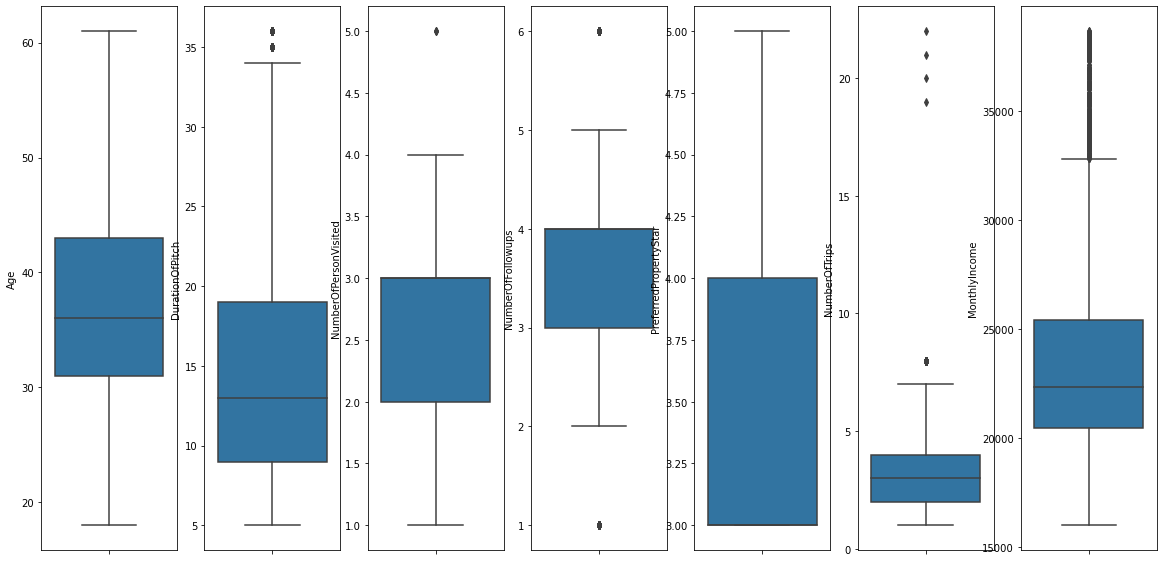

In [562]:


data.drop(indexUL,inplace=True)
data.drop(indexLM,inplace=True)

Outliers = ['Age','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar',
 'NumberOfTrips','MonthlyIncome']


plt.figure(figsize=(20,10))
for i in enumerate(Outliers):
    plt.subplot(1,7,i[0]+1)
    sns.boxplot(y=data[i[1]])
    



In [567]:
def get_iqr(df,column_name,q1_range,q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3-q1
    upper_fence = q3 + (1.5*IQR)
    lower_fence = q1 - (1.5*IQR)
    
    return IQR,upper_fence,lower_fence
    


iqr,UF,LF = get_iqr(data,'NumberOfTrips',0.20,0.75)
print(iqr)
print(UF)
print(LF)


indexUL = data[data['NumberOfTrips']>UF].index
indexLM = data[data['NumberOfTrips']<LF].index

print("indexUL"+str(indexUL))
print("indexLM"+str(indexLM))


2.0
7.0
-1.0
indexULInt64Index([2446, 2453, 2558, 2579, 2603, 2605, 2662, 2665, 2691, 2694,
            ...
            4651, 4676, 4685, 4735, 4754, 4778, 4840, 4847, 4857, 4867],
           dtype='int64', length=105)
indexLMInt64Index([], dtype='int64')


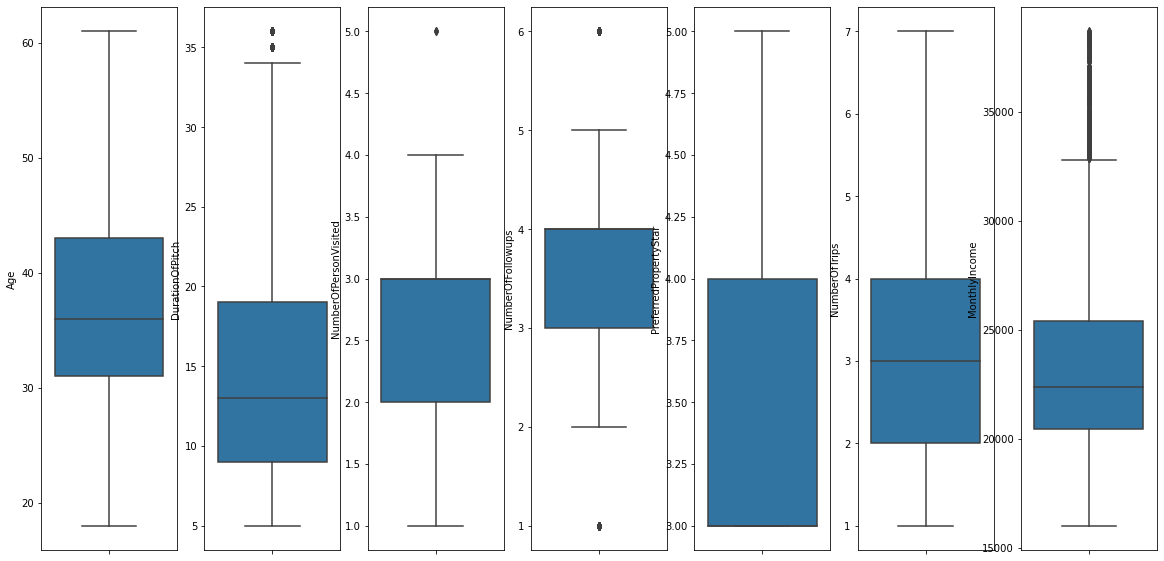

In [568]:


data.drop(indexUL,inplace=True)
data.drop(indexLM,inplace=True)

Outliers = ['Age','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar',
 'NumberOfTrips','MonthlyIncome']


plt.figure(figsize=(20,10))
for i in enumerate(Outliers):
    plt.subplot(1,7,i[0]+1)
    sns.boxplot(y=data[i[1]])
    



In [573]:
def get_iqr(df,column_name,q1_range,q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3-q1
    upper_fence = q3 + (1.5*IQR)
    lower_fence = q1 - (1.5*IQR)
    
    return IQR,upper_fence,lower_fence
    


iqr,UF,LF = get_iqr(data,'NumberOfPersonVisited',0.20,0.75)
print(iqr)
print(UF)
print(LF)


indexUL = data[data['NumberOfPersonVisited']>UF].index
indexLM = data[data['NumberOfPersonVisited']<LF].index

print("indexUL"+str(indexUL))
print("indexLM"+str(indexLM))


1.0
4.5
0.5
indexULInt64Index([3977, 4002, 4105], dtype='int64')
indexLMInt64Index([], dtype='int64')


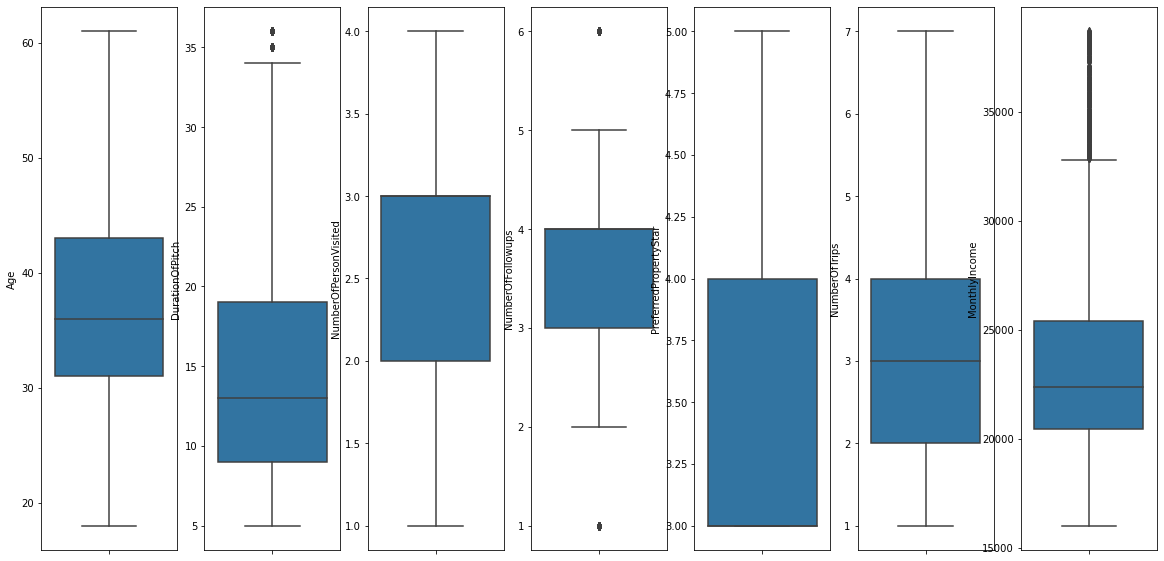

In [574]:


data.drop(indexUL,inplace=True)
data.drop(indexLM,inplace=True)

Outliers = ['Age','DurationOfPitch','NumberOfPersonVisited','NumberOfFollowups','PreferredPropertyStar',
 'NumberOfTrips','MonthlyIncome']


plt.figure(figsize=(20,10))
for i in enumerate(Outliers):
    plt.subplot(1,7,i[0]+1)
    sns.boxplot(y=data[i[1]])
    



In [575]:
data

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,ProdTaken
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,1
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,1
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,1
4884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,1
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,1
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,1


In [576]:
data.corr()

,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome,ProdTaken
Age,1.000000,-0.018753,-0.017028,0.014256,0.001552,-0.013932,0.191957,0.033984,0.016910,0.045883,0.006467,0.480541,-0.142352
CityTier,-0.018753,1.000000,0.011731,0.004814,0.023245,-0.005438,-0.017893,0.004763,-0.041987,0.002959,0.001853,0.053235,0.087147
DurationOfPitch,-0.017028,0.011731,1.000000,0.082258,0.022179,-0.000149,0.030288,0.039479,0.005781,-0.009345,0.042358,0.006665,0.085773
NumberOfPersonVisited,0.014256,0.004814,0.082258,1.000000,0.324117,0.027408,0.163927,0.014077,-0.022375,0.009479,0.605162,0.210416,0.007254
NumberOfFollowups,0.001552,0.023245,0.022179,0.324117,1.000000,-0.027867,0.117055,0.008888,-0.001884,0.013643,0.279000,0.181983,0.108702
PreferredPropertyStar,-0.013932,-0.005438,-0.000149,0.027408,-0.027867,1.000000,0.006256,0.000458,-0.021232,0.014991,0.029782,-0.002528,0.098288
NumberOfTrips,0.191957,-0.017893,0.030288,0.163927,0.117055,0.006256,1.000000,0.014887,-0.013652,-0.018739,0.141888,0.135101,0.001192
Passport,0.033984,0.004763,0.039479,0.014077,0.008888,0.000458,0.014887,1.000000,0.004868,-0.018767,0.024095,0.000906,0.257574
PitchSatisfactionScore,0.016910,-0.041987,0.005781,-0.022375,-0.001884,-0.021232,-0.013652,0.004868,1.000000,0.071850,0.000686,0.037076,0.053066
OwnCar,0.045883,0.002959,-0.009345,0.009479,0.013643,0.014991,-0.018739,-0.018767,0.071850,1.000000,0.025143,0.073515,-0.009197


<AxesSubplot:>

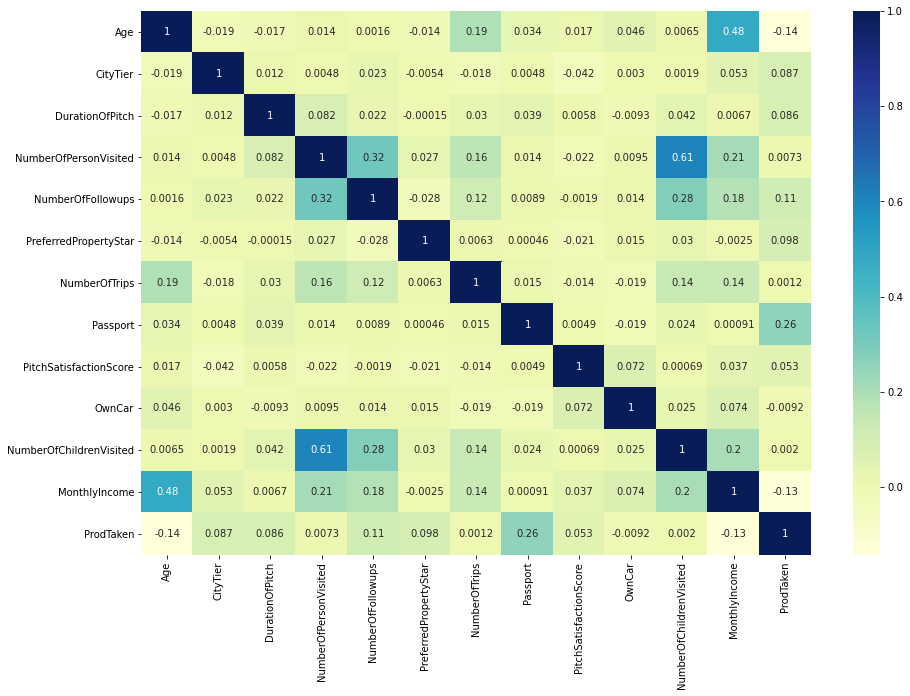

In [578]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap="YlGnBu", annot=True)

In [580]:
data

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome,ProdTaken
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,1
1,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,1
3,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,1
4884,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,1
4885,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,1
4886,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,1
